# [Jm1 Dataset](https://www.openml.org/search?type=data&sort=runs&id=1053&status=active)
<hr>

## Dataset Description and Exploration

This data is used to predict whether a module or function in a software program will contain a defect based on several features including but not limited to: the lines of code, design complexity, percentage of difficulty, and the program length. These input features and the way they are obtained were made by researchers McCabe and Halstead to evaluate software programs.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,learning_curve
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,f1_score,roc_auc_score,recall_score,roc_curve
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Reading data from csv file

These features represent different aspects of a software program. there are 5 features for the length of the program, 3 features calculated using McCabe's metrics, and 12 Halstead features (4 base features, and 8 derived features).

<ol>
    <li>loc: McCabe's line count of code</li>
    <li>v(g): McCabe's 'cyclomactic complexity'</li>
    <li>ev(g): McCabe's 'essential complexity'</li>
    <li>iv(g): McCabe's 'design complexity'</li>
    <li>n: Halstead total operators + operands</li>
    <li>v: Halstead 'volume'</li>
    <li>l: Halstead 'program length'</li>
    <li>d: Halstead 'difficulty'</li>
    <li>i: Halstead 'intelligence'</li>
    <li>e: Halstead 'effort</li>
    <li>b : Halstead</li>
    <li>t : Halstead’s time estimator</li>
    <li>lOCode : Halstead’s line count</li>
    <li>lOComment : Halstead’s count of lines of comments</li>
    <li>lOBlank : Halstead’s count of blank lines</li>
    <li>lOCodeAndComment: Halstead's lines of code and comment</li>
    <li>uniq_Op : unique operators</li>
    <li>uniq_Opnd : unique operands</li>
    <li>total_Op : total operators</li>
    <li>total_Opnd : total operands</li>
    <li>branchCount</li>
   </ol>
        
Label: defects : {False,True} module has/has not one or more reported defects
    

In [2]:
df=pd.read_csv('jm1_csv.csv')
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


There are 21 input features, one label (defects), and 10,885 rows in this dataset

In [3]:
df.shape

(10885, 22)

All 21 input features are positive values; some of the features are integers and some contain float values

In [4]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [5]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,...,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,...,2.046465e+03,26.252274,2.737529,4.62554,0.370785,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,...,2.413154e+04,59.611201,9.008608,9.96813,1.907969,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.00000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.00000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,...,6.342500e+02,28.000000,2.000000,5.00000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.00000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


There is a small number of null values, so it will not affect the dataset if they are dropped

In [6]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [3]:
df.dropna(inplace=True)

## Data Visualizations
<hr>

As we can see from this correlation matrix, many of the columns are positively correlated such as branchCount and v(g), or lOCode and total_Opnd

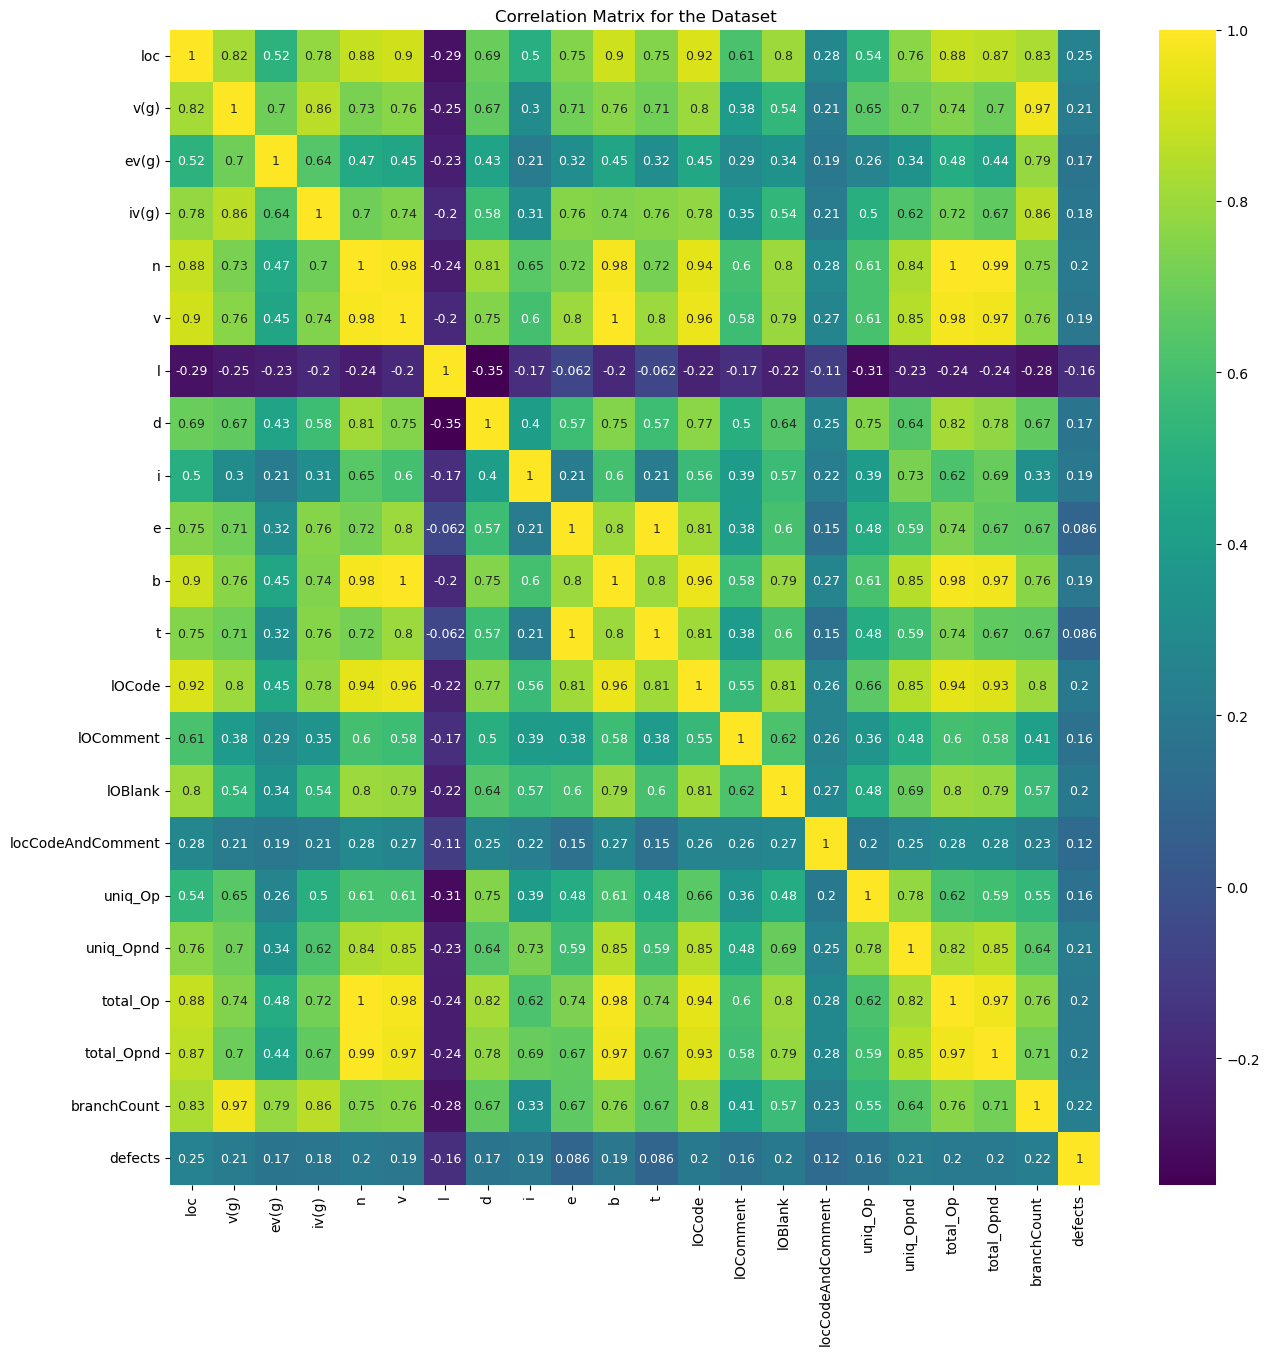

In [8]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True,ax=ax,annot_kws={'fontsize':9})
plt.title('Correlation Matrix for the Dataset')
plt.show()

Plotting loc and v(g) in a scatter plot because they are closely related as indicated by the correlation matrix

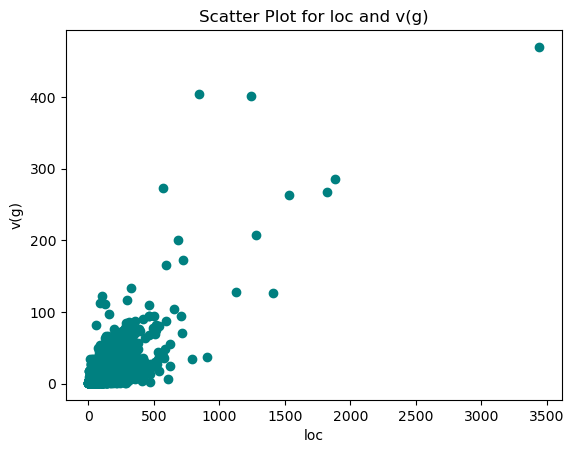

In [9]:
plt.scatter(x=df['loc'],y=df['v(g)'],color=['Teal'])
plt.ylabel('v(g)')
plt.xlabel('loc')
plt.title('Scatter Plot for loc and v(g)')
plt.show()

Plotting lOCode and b in a scatter plot to see the relation between them

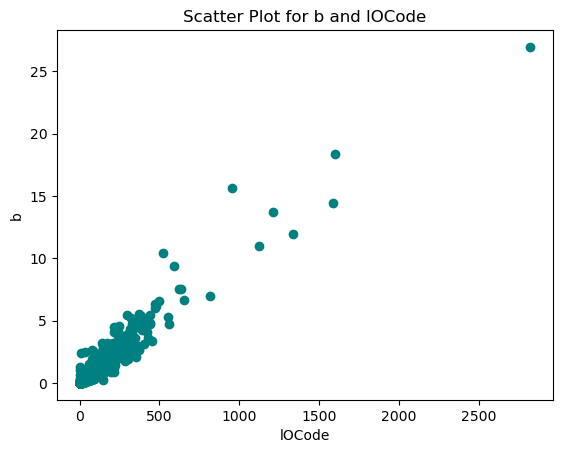

In [10]:
plt.scatter(x=df['lOCode'],y=df['b'],color=['Teal'])
plt.ylabel('b')
plt.xlabel('lOCode')
plt.title('Scatter Plot for b and lOCode')
plt.show()

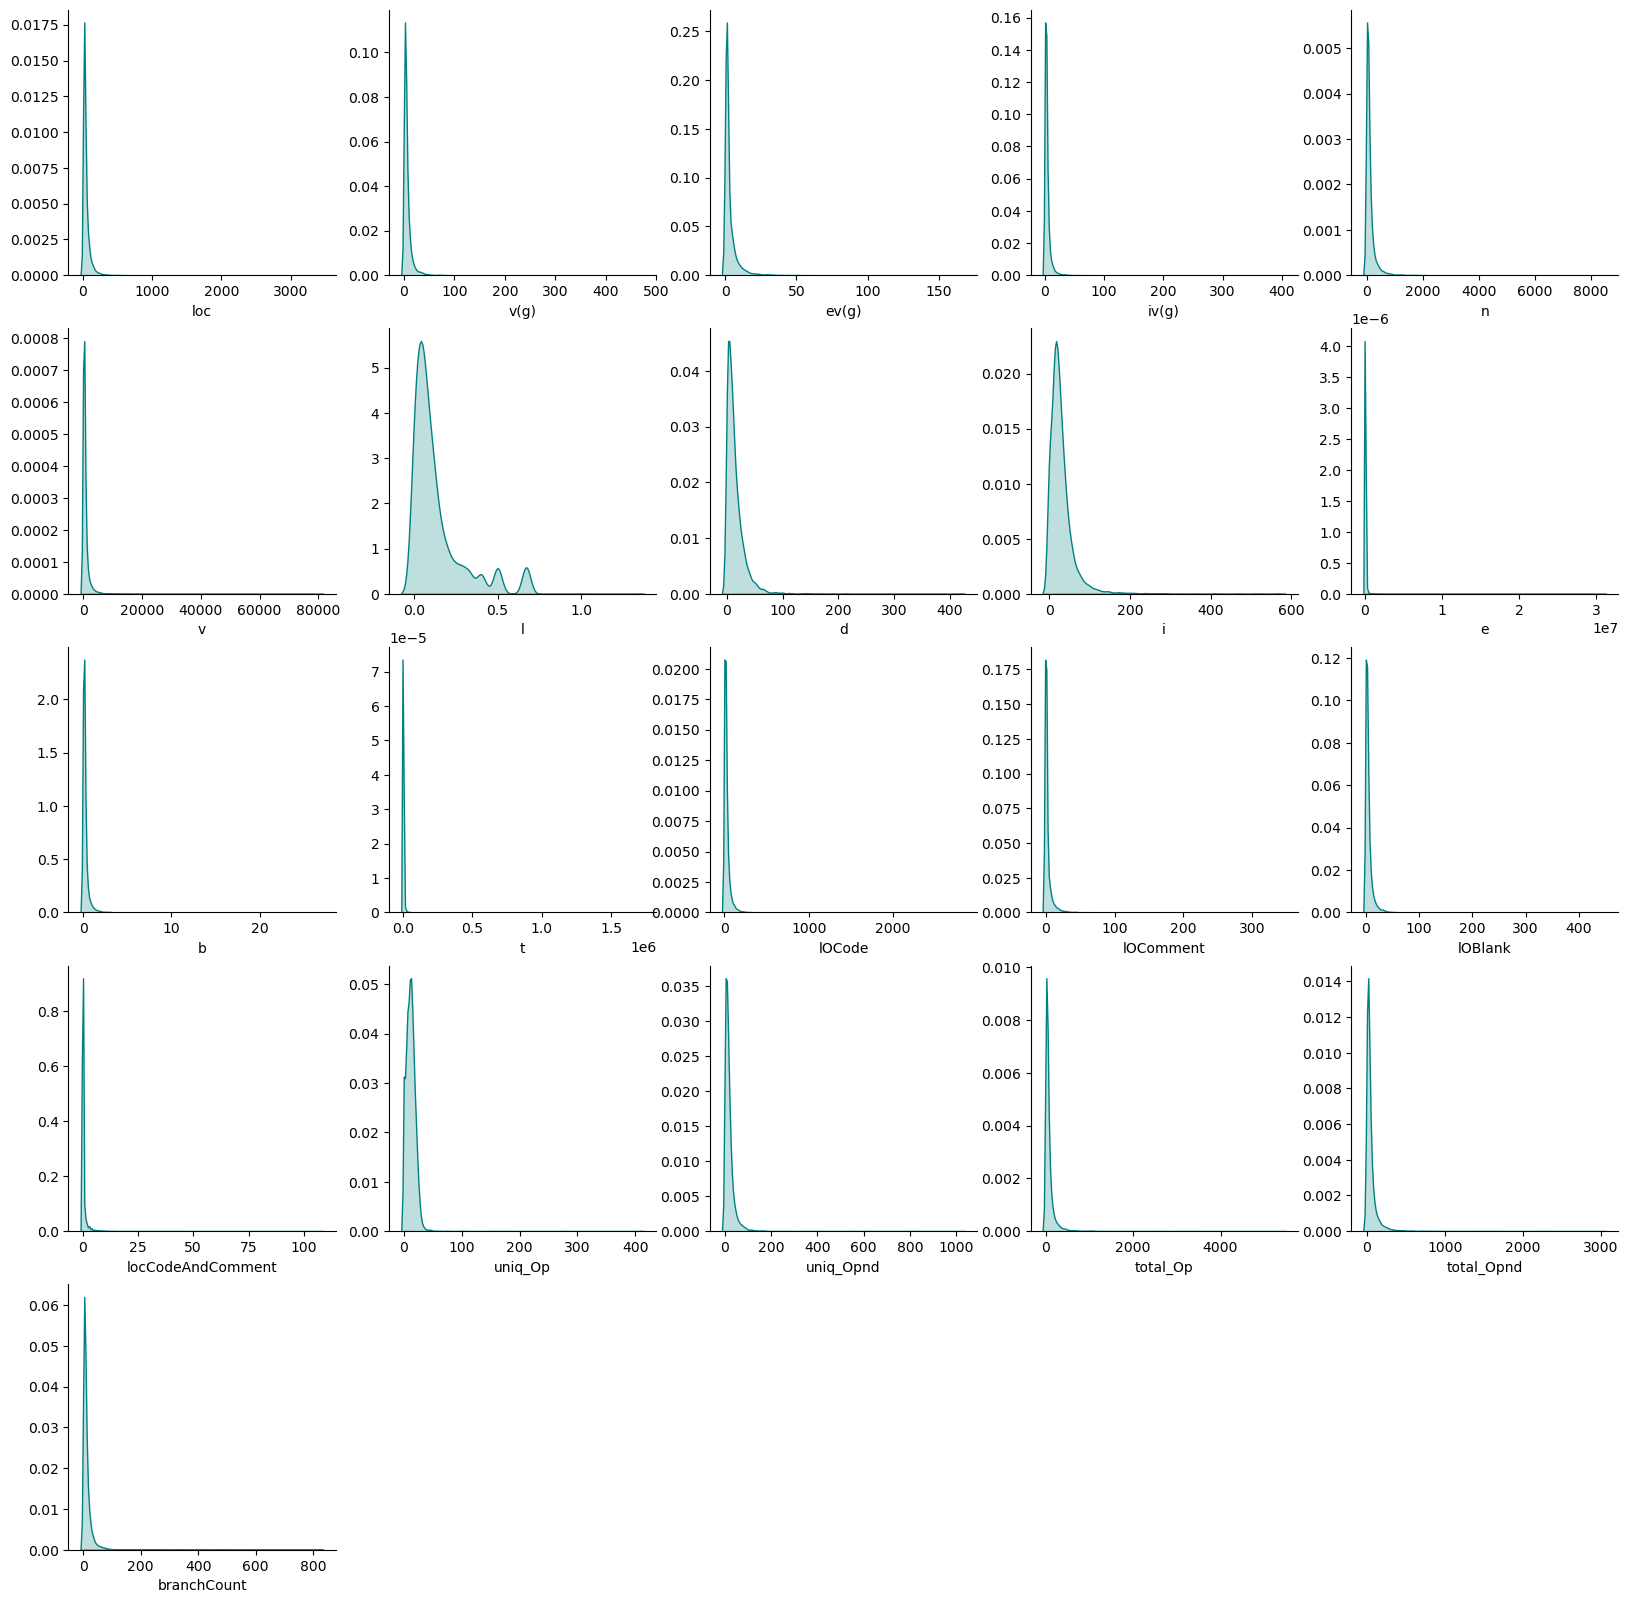

In [11]:
fig,axs=plt.subplots(5,5,figsize=(20,20))
cnt=1
for i in df.columns:
    if i=='defects':
        continue
    plt.subplot(5,5,cnt)
    p=sns.kdeplot(df[i],color='#008080',fill=True)
    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    plt.ylabel('')
    cnt+=1
axs[4,1].set_visible(False)
axs[4,2].set_visible(False)
axs[4,3].set_visible(False)
axs[4,4].set_visible(False)
# plt.title('KDE Plots for All the Features') the title overlapped with the plots
plt.show()

By taking a quick look at the different features's distributions, we can see that all the data is skewed right

In [ ]:
df['defects'].unique()

array([False,  True])

Replacing the label column values (True and False) with 0 and 1 for easier handling

In [4]:
df['defects'].replace({True:1,False:0})

0        0
1        1
2        1
3        1
4        1
        ..
10880    0
10881    0
10882    0
10883    0
10884    0
Name: defects, Length: 10880, dtype: int64

In [ ]:
print(df['defects'].value_counts())
data=df['defects'].value_counts().to_list()

False    8777
True     2103
Name: defects, dtype: int64


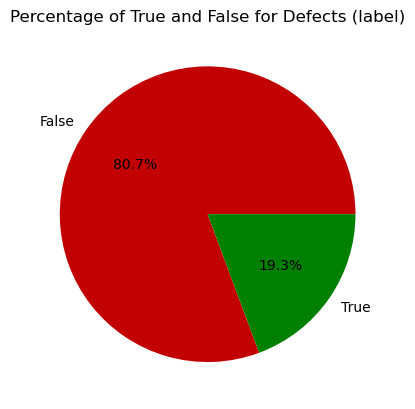

In [ ]:
plt.pie(data,labels=['False','True'],colors=['#c20202','Green'],autopct='%1.1f%%')
plt.title('Percentage of True and False for Defects (label)')
plt.show()

The pie chart above shows the label column's (defects) distribution. As we can see this is an unbalanced dataset since the false percentage is over 80% of the data

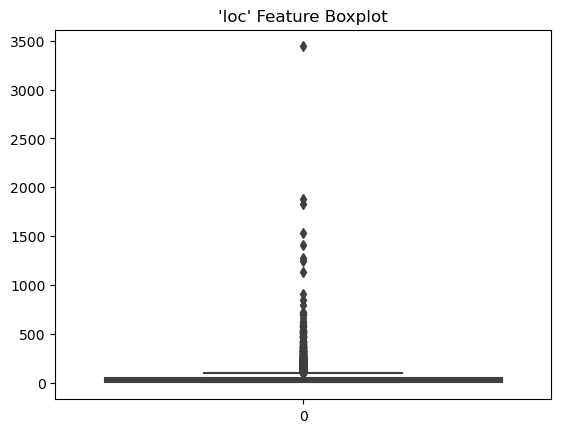

In [ ]:
sns.boxplot(data=df['loc'])
plt.title("'loc' Feature Boxplot")
plt.show()

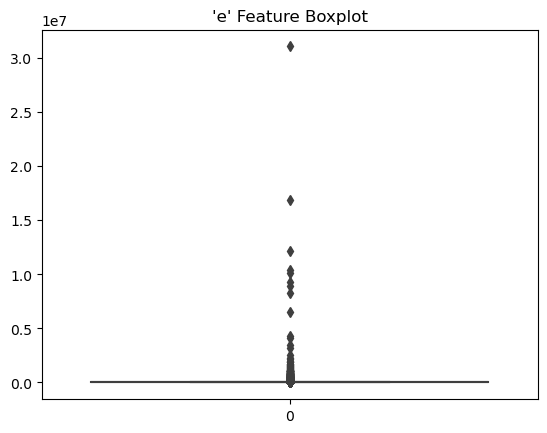

In [ ]:
sns.boxplot(data=df['e'])
plt.title("'e' Feature Boxplot")
plt.show()

As we can see from these boxplots, there are some outliers in the data

In [ ]:
print(df.shape)
print(df[df.duplicated()==True].shape)

(10880, 22)
(1973, 22)


As can be seen, this data has many duplicated values (over 1900). It is unknown whether this data was duplicated accidentally or if it is part of the data, but it cannot be removed because as we will see in Model Training, removing it affects the accuracy greatly.

## Model Training
<hr>

## 1) Random Forest Classifier

Splitting the features and the label

In [5]:
X=df.drop(columns=['defects'])
Y=df['defects']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('Training score: ',rf.score(x_train,y_train))
print('Testing score: ',rf.score(x_test,y_test))

Training score:  0.9891018907563025
Testing score:  0.8079044117647058


In [9]:
train_sizes, train_scores, test_scores=learning_curve(rf,x_train,y_train,cv=2,train_sizes=np.linspace(0.1,1.0,2))

In [13]:
print(test_scores)

[[0.8072479  0.81092437]
 [0.81197479 0.8177521 ]]


In [25]:
train_sizes, train_scores, test_scores, fit_times,_ = learning_curve(rf, x_train, y_train, cv=3, train_sizes=np.linspace (0.1, 1.0, 10),return_times=True)

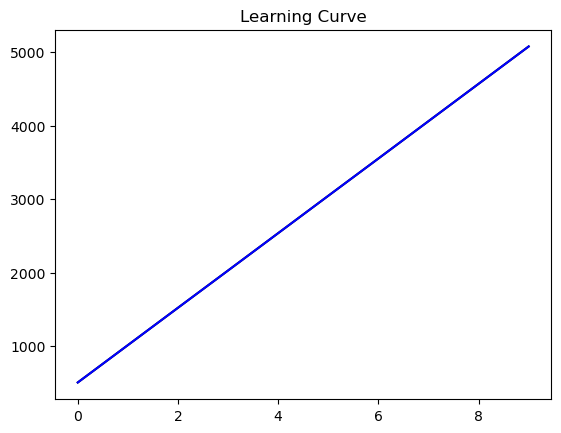

In [27]:
plt.plot(train_sizes,'k',label="Training Score")
plt.plot(train_sizes,'b',label="Test Score")
plt.title('Learning Curve')
plt.show()

The model is clearly overfitting because the training accuracy is so much greater than the test accuracy

In [ ]:
print(np.sort(rf.feature_importances_))

[0.01480432 0.02300331 0.02677391 0.02836785 0.03549994 0.03639264
 0.04368575 0.04474826 0.04597382 0.04664646 0.0499623  0.04999385
 0.05001154 0.05149987 0.05178591 0.05240699 0.05305227 0.05516321
 0.05587921 0.05725786 0.12709073]


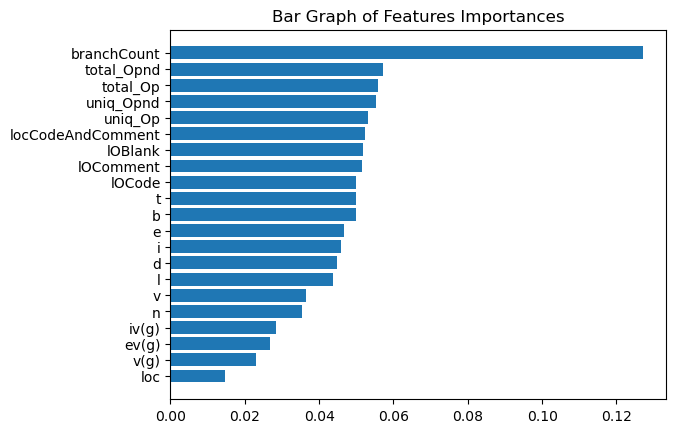

In [ ]:
plt.barh(np.arange(21),np.sort(rf.feature_importances_),align='center')
plt.yticks(np.arange(21),X.columns)
plt.title('Bar Graph of Features Importances')
plt.show()

Creating a bar graph of the most important features according to the random forest model
<br><br>

###### Using grid search to find the best hyperparameters for this data:

Creating a dictionary that contains the possible values for some hyperparameters

In [ ]:
params = {
'n_estimators': [100, 200,300],
'max_depth': [4, 8, 16],
'max_leaf_nodes': [None, 8, 14],
'min_samples_split':[6,8,12],
'min_samples_leaf':[5,7,11],
}
#Note: these values might be too little, but using more values would take too long

In [ ]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=params)
grid.fit(x_train,y_train)
print(grid.best_estimator_)

RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=6)


Now we have the best hyperparameters to use

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
rf_hparams_tuned=RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=6)
rf_hparams_tuned.fit(x_train,y_train)
print('Training score: ',rf_hparams_tuned.score(x_train,y_train))
print('Testing score: ',rf_hparams_tuned.score(x_test,y_test))

Training score:  0.8782169117647058
Testing score:  0.8088235294117647


In [ ]:
y_pred_hparams_tuned=rf_hparams_tuned.predict(x_test)
print(classification_report(y_test,y_pred_hparams_tuned))

              precision    recall  f1-score   support

       False       0.83      0.97      0.89      1755
        True       0.53      0.16      0.25       421

    accuracy                           0.81      2176
   macro avg       0.68      0.56      0.57      2176
weighted avg       0.77      0.81      0.77      2176



The model does well for false values but is around 20% for predicting true values.

The score is now better, but let's check the confusion matrix:

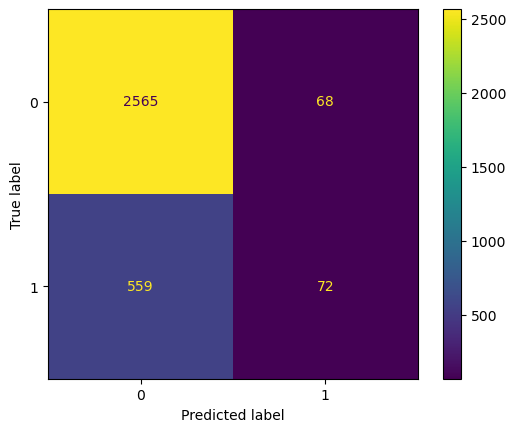

In [ ]:
y_pred_tuned=rf_hparams_tuned.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tuned)).plot()

Looking at this matrix, we can see that the level of true negatives is good, but the true positives (the minority of the data) is very small. Also the number of false negatives is very large. A reason for this could be that the data is unbalanced, 80% of the data is false while 20% is true. We could make the model more sensitive to true values than to false values by changing the class weight attribute to suit the unbalanced data. This way we give more weight to the minority class so the model can be more sensitive to it.

#### Changing Weight Classes

The default value for the weights is 1. We will change this value because the data is not the same size classes, the model could perform better if we gave different weights according to the different size classes.

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
rf_weights=RandomForestClassifier(class_weight={0: 17, 1: 83}, max_depth=12,min_samples_leaf=9, min_samples_split=10,n_estimators=300)
#i changed some of the hyperparameters of the random forest after grid search because it was slightly overfitting
rf_weights.fit(x_train,y_train)
print('Training score: ',rf_weights.score(x_train,y_train))
print('Testing score: ',rf_weights.score(x_test,y_test))

y_pred_weights=rf_weights.predict(x_test)
print(classification_report(y_test,y_pred_weights))

Training score:  0.8328518907563025
Testing score:  0.7352941176470589
              precision    recall  f1-score   support

       False       0.88      0.77      0.83      2633
        True       0.38      0.57      0.46       631

    accuracy                           0.74      3264
   macro avg       0.63      0.67      0.64      3264
weighted avg       0.79      0.74      0.75      3264



The model has improved slightly, but the classification report showed the recall of the true values to be 0.57. This means the model is able to only predict 57% of the true values

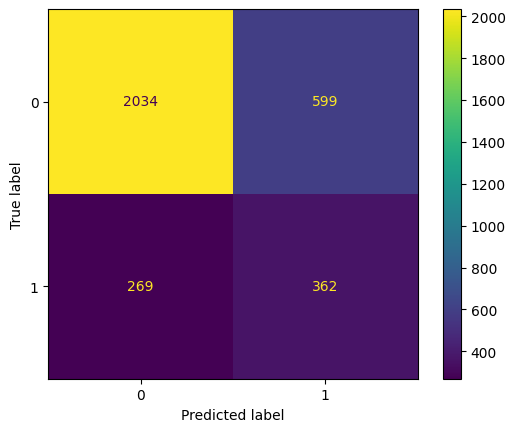

In [ ]:
y_pred_weights=rf_weights.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_weights)).plot()

#### Oversampling

Another way of fixing the unbalanced data problem is oversampling, or adding more rows of the minority class to match the majority class. This is can done by randomly duplicating some of the minority class (True) records.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
os=RandomOverSampler(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled=os.fit_resample(x_train,y_train)

Now the true values and the false values are of the same size

In [ ]:
rf_oversampled=RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=6)
rf_oversampled.fit(x_resampled,y_resampled)
print('Training score: ',rf_oversampled.score(x_train,y_train))
print('Testing score: ',rf_oversampled.score(x_test,y_test))

Training score:  0.9342174369747899
Testing score:  0.7689950980392157


In [ ]:
y_pred_oversampled=rf_oversampled.predict(x_test)
print(classification_report(y_test,y_pred_oversampled))

              precision    recall  f1-score   support

       False       0.87      0.84      0.85      2633
        True       0.41      0.46      0.44       631

    accuracy                           0.77      3264
   macro avg       0.64      0.65      0.65      3264
weighted avg       0.78      0.77      0.77      3264



As we can see, the model performed slightly worse than with the weights

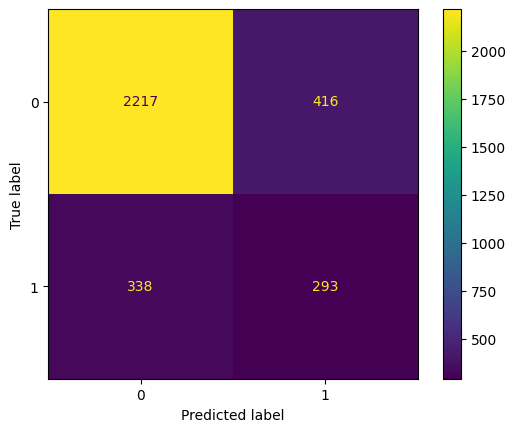

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_oversampled)).plot()

#### Changing Probability Threshold

The default threshold is 0.5, so increasing this value will ensure that the model is more certain that a value is false before it classifies it as such.

Below is a loop that iterates over different threshold values to find the best value. It does this by comparing the area under the curve scores of different threshold value's predictions

In [ ]:
thresh=0.5
optimum=0 #value to store best threshold
score=0
nebw_score=0
y_pred_proba=rf_hparams_tuned.predict_proba(x_test)
while thresh<0.95:
    y_pred_new=[]#new list to store new values after threshold adjustment
    for i in y_pred_proba:
        if i[0]>thresh:
            y_pred_new.append(0)
        else:
            y_pred_new.append(1)
    new_score=roc_auc_score(y_test,y_pred_new)
    if score<new_score:
        score=new_score
        optimum=thresh
    thresh+=0.001
print('The optimum threshold values is: ',optimum)
print('The AUC score of that threshold is:',score)

The optimum threshold values is:  0.8030000000000003
The AUC score of that threshold is: 0.6906713766571249


In [13]:
y_pred_proba=rf_hparams_tuned.predict_proba(x_test)
y_pred_new=[]
for i in y_pred_proba:
    if i[0]>0.8:
        y_pred_new.append(0)
    else:
        y_pred_new.append(1)
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

       False       0.90      0.68      0.78      1755
        True       0.34      0.68      0.45       421

    accuracy                           0.68      2176
   macro avg       0.62      0.68      0.61      2176
weighted avg       0.79      0.68      0.71      2176



As we can see, the model is now better at predicting true values. It has an f1-score of 45% for the true values, and 78% for false values. The recall for the true values is 70%. Almost all methods of handling imbalanced data were tried to improve the model, but maybe a different model, such as logistic regression will improve it further.

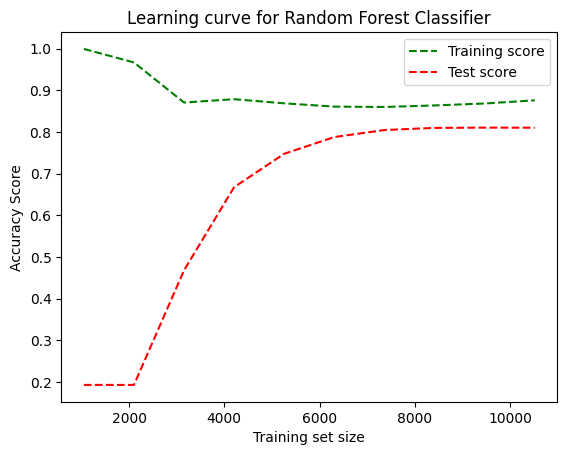

In [ ]:
estimator = RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=6)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    estimator, X, Y, cv=30, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'g--',label="Training score",)
plt.plot(train_sizes, test_mean, 'r--',label="Test score")
plt.xlabel('Training set size')
plt.ylabel("Accuracy Score")
plt.title('Learning curve for Random Forest Classifier')
plt.legend()
plt.show()

Above is the learning curve for the model, the green line represents the training score, and the red line represents the testing score. As we can see, the test accuracy is low at first but increases, and the training accuracy is high at first but decreases. Both testing and training accuracies meet at around 80%

### 2) Logistic Regression

In [15]:
X=df.drop(columns=['defects'])
Y=df['defects']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
lr=LogisticRegression(max_iter=300)
lr.fit(x_train,y_train)
print('Training score: ',lr.score(x_train,y_train))
print('Testing score: ',lr.score(x_test,y_test))

Training score:  0.8038340336134454
Testing score:  0.7965686274509803


In [ ]:
y_pred_lr=lr.predict(x_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

       False       0.81      0.97      0.89      2633
        True       0.35      0.06      0.11       631

    accuracy                           0.80      3264
   macro avg       0.58      0.52      0.50      3264
weighted avg       0.72      0.80      0.73      3264



### Handling Skewed Data
<hr>

Looking at the kde plots above we observed that all the features of this dataset are severely right skewed. We will apply log operation to fix this

In [ ]:
X.skew().sort_values(ascending=False)

t                    46.201622
e                    46.201622
locCodeAndComment    22.301775
iv(g)                21.479641
lOCode               17.626780
v                    15.663414
b                    15.656479
v(g)                 15.217387
loc                  14.824015
uniq_Op              14.567006
uniq_Opnd            13.648073
lOBlank              13.552133
branchCount          11.634563
lOComment            11.391902
total_Op             11.287711
n                    10.489603
total_Opnd            9.502286
ev(g)                 8.186656
d                     6.018034
i                     5.152927
l                     1.920659
dtype: float64

The skew() function used above shows how skewed the data is. Data that is not skewed at all will have this value as 0
<br><br><br>

Since we are applying a log operation, we have to remove zero values as log 0 is undefined. We will add a constant value (1) to all the columns that contain zeros to fix this problem

In [17]:
# iterating over the columns to check for zeros, if any value in the entire column is 0,
# then a constant is added to the entire column
constant=1
for name in X.columns:
    if len(X[X[name]==0])!=0:
        X[name].add(constant)

In [18]:
X_log=np.log1p(X)

In [ ]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,...,1.088000e+04,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,673.772003,0.135352,14.177339,29.43885,3.684563e+04,...,2.046980e+03,26.253125,2.738787,4.625092,0.370956,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.608641,13.021924,6.772697,9.118682,249.549291,1939.253379,0.160552,18.712325,34.42332,4.344671e+05,...,2.413706e+04,59.622819,9.010486,9.969914,1.908391,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.86000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.92500,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,620.850000,0.160000,18.902500,36.78000,1.141615e+04,...,6.342350e+02,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.78000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


Looking at this desciption of the data, we can see that some columns have high standard deviations, which can negatively affect logistic regression. To fix this we will standardize the data to make the standard deviation = 1 and the mean = 0. This will be done using the StandardScaler tool in sklearn.preprocessing

In [19]:
scaler=StandardScaler()
scaler.fit(X_log)
X_std_log=scaler.transform(X_log)

In [20]:
estimator=LogisticRegression(class_weight={0:20,1:80})
sfs=SequentialFeatureSelector(estimator,n_features_to_select='auto')
sfs.fit(X_std_log,Y)
features=sfs.get_support()
feats=list(X.columns[features])
print(feats)

['v(g)', 'ev(g)', 'iv(g)', 'd', 'i', 'b', 'lOCode', 'lOComment', 'locCodeAndComment', 'uniq_Op']


Using sequential forward selection to find the best features to use in the model
Note: the class_weight attribute is set to handle the unbalanced data as explained in random forest

In [33]:
X_std_log=df[feats]

Changing X to contain only the important features based on the sequential forward selection

In [34]:
x_train_std,x_test_std,y_train,y_test=train_test_split(X_std_log,Y,random_state=42,test_size=0.3)
#splitting the data after the preprocessing

In [35]:
lr=LogisticRegression(max_iter=300,class_weight={0:100-80,1:80})
lr.fit(x_train_std,y_train)
print('Training score: ',lr.score(x_train_std,y_train))
print('Testing score: ',lr.score(x_test_std,y_test))

Training score:  0.7436974789915967
Testing score:  0.7316176470588235


In [ ]:
y_pred_lr=lr.predict(x_test_std)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

       False       0.86      0.80      0.83      2619
        True       0.36      0.46      0.41       645

    accuracy                           0.73      3264
   macro avg       0.61      0.63      0.62      3264
weighted avg       0.76      0.73      0.74      3264



As we can see from the classification report, the f1 score of the true values is now 41%, which is used to be 10% before preprocessing, so there is an improvement

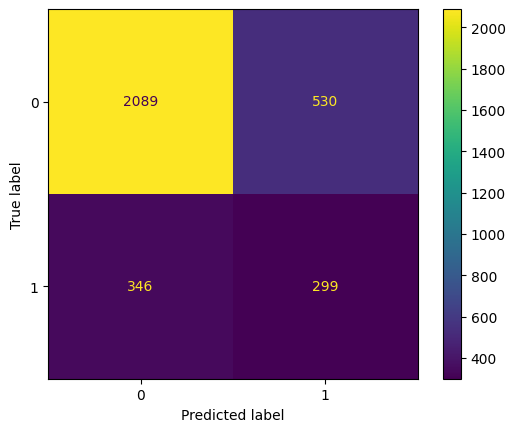

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lr)).plot()

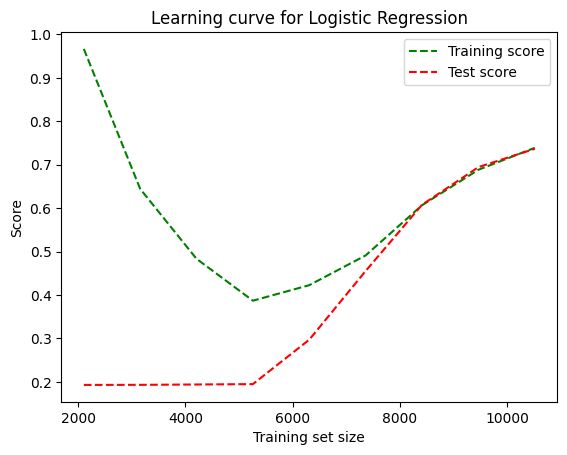

In [ ]:
estimator = LogisticRegression(max_iter=1000,class_weight={0:100-80,1:80})

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    estimator, X_std_log, Y, cv=30, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,'g--', label="Training score")
plt.plot(train_sizes, test_mean, 'r--',label="Test score")
plt.xlabel('Training set size')
plt.ylabel("Score")
plt.title('Learning curve for Logistic Regression')
plt.legend()
plt.show()

Looking at this learning curve, we see the test score increase slightly at 5000 records, and peaks at 10,000 at around 70%. As for the training score, it decreases dramatically from 2,000 to 5,000 records, and starts to increase at 6,000 with score 0.7.

### 3) K Nearest Neighbor

In [37]:
#seperating the features and the label
X=df.drop(columns=['defects'])
Y=df['defects']

The KNN model is also affected by data skewing, so the same log operation will be applied to it. Also since the KNN model looks at its nearest points and calculates distance, high standard deviation will affect the model performance, so standardization will also be applied

In [38]:
#columns with zeroes in them have a constant (one) added to them so the log operation can be applied
for name in X.columns:
    if len(X[X[name]==0])!=0:
        X[name].add(1)

In [39]:
X_log=np.log1p(X)

In [40]:
scaler=StandardScaler()
scaler.fit(X_log)
X_std_log=scaler.transform(X_log)

In [41]:
x_train_std,x_test_std_knn,y_train,y_test=train_test_split(X_std_log,Y,random_state=42,test_size=0.3)

In [42]:
# Creating a list of k values, and calculating the score for each value to find the optimal k value
k_values = range(5,30,2)
scores = []
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_std, y_train)
    y_pred_knn = knn.predict(x_test_std_knn)
    scores.append(knn.score(x_test_std_knn,y_test))

Text(0, 0.5, 'Test Score')

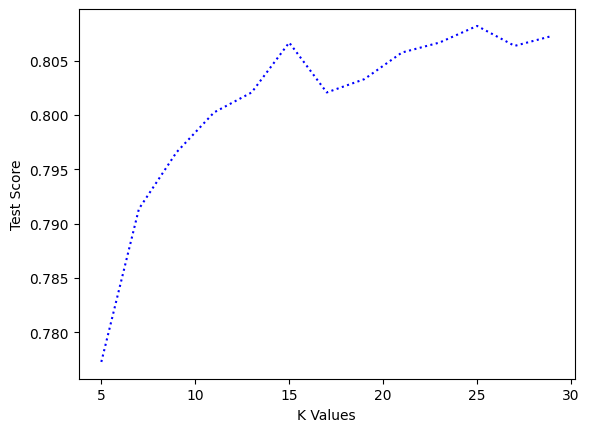

In [ ]:
plt.plot(k_values, scores,'b:')
plt.xlabel('K Values')
plt.ylabel('Test Score')

This graph shows the score compared to different k values, it looks like the highest score is at k=24

In [43]:
knn_tuned=KNeighborsClassifier(n_neighbors=24)
knn_tuned.fit(x_train_std,y_train)
print('Training Score',knn_tuned.score(x_train_std,y_train))
print('Test Score',knn_tuned.score(x_test_std_knn,y_test))

Training Score 0.8249737394957983
Test Score 0.8088235294117647


In [44]:
y_pred_knn=knn_tuned.predict(x_test_std_knn)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

       False       0.82      0.97      0.89      2619
        True       0.57      0.14      0.22       645

    accuracy                           0.81      3264
   macro avg       0.69      0.56      0.56      3264
weighted avg       0.77      0.81      0.76      3264



There is still the same problem of the unbalanced data because the f1 score of the false values is 89%, while for the true class is 22%. We will fix this by adjusting the threshold as we have done before.

<br><br>

As explained in random forest classifier this is a loop that iterates over different threshold values to find the best value. It does this by comparing the area under the curve scores of different threshold value's predictions

In [ ]:
thresh=0.5
optimum=0 #value to store best threshold
score=0
new_score=0
y_pred_prob=knn_tuned.predict_proba(x_test_std_knn)
while thresh<0.95:
    y_pred_new=[]#new list to store new values after threshold adjustment
    for i in y_pred_prob:
        if i[0]>thresh:
            y_pred_new.append(0)
        else:
            y_pred_new.append(1)
    new_score=roc_auc_score(y_test,y_pred_new)
    if score<new_score:
        score=new_score
        optimum=thresh
    thresh+=0.001
print('The optimum threshold values is: ',optimum)
print('The AUC score of that threshold is:',score)

The optimum threshold values is:  0.7920000000000003
The AUC score of that threshold is: 0.6708081373149702


In [ ]:
y_pred_proba=knn_tuned.predict_proba(x_test_std_knn)
y_pred_new=[]
for i in y_pred_proba:
    if i[0]>0.819:
        y_pred_new.append(0)
    else:
        y_pred_new.append(1)
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

       False       0.90      0.63      0.74      2619
        True       0.32      0.71      0.44       645

    accuracy                           0.65      3264
   macro avg       0.61      0.67      0.59      3264
weighted avg       0.78      0.65      0.68      3264



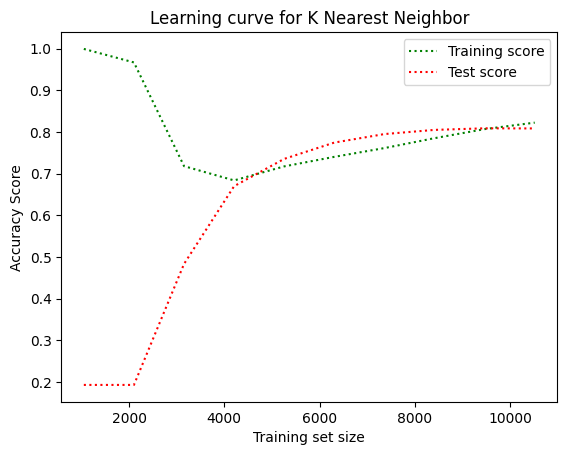

In [ ]:
estimator = KNeighborsClassifier(n_neighbors=24)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    estimator, X_std_log, Y, cv=30, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,'g:', label="Training score")
plt.plot(train_sizes, test_mean,'r:', label="Test score")
plt.xlabel('Training set size')
plt.ylabel("Accuracy Score")
plt.title('Learning curve for K Nearest Neighbor')
plt.legend()
plt.show()

From this learning curve, we can see that the training score is high at first, then decreases greatly followed by a slight increase to 80%. For the testing score it starts at 20%, then increases greatly then continues to increase slightly to 80%

# ROC Curve

In order to compare the performance of the three different models, we will create a ROC (receive operating characteristic) curve.

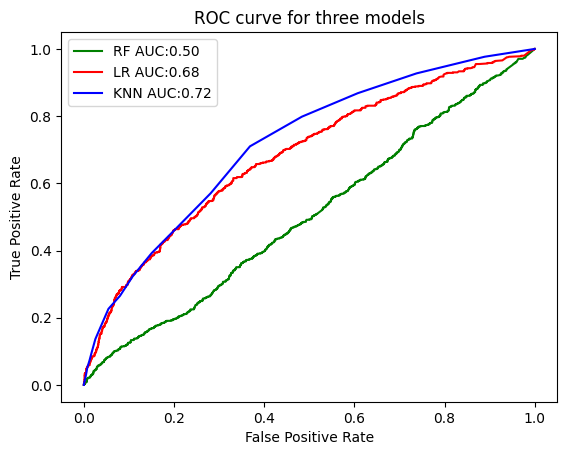

In [49]:
#getting the probability of prediction of some values of the models
rf_proba=rf_weights.predict_proba(x_test)
lr_proba=lr.predict_proba(x_test_std)
knn_proba=knn_tuned.predict_proba(x_test_std_knn)

#list to store the predict_probas to iterate over them with a for loop
probas=[rf_proba,lr_proba,knn_proba]
#list to store colors and line shapes
clrs=['g-','r-','b-']
#list to store labels for the legend
labels=['RF','LR','KNN']

for i in range(len(probas)):
  fpr,tpr,thresholds=roc_curve(y_test,probas[i][:,1],drop_intermediate=True)
  auc=roc_auc_score(y_test,probas[i][:,1])
  plt.plot(fpr,tpr,clrs[i],label=labels[i]+ ' AUC:%.2f'%auc)
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for three models')
plt.show()

Looking at this graph we can see the three lines representing the different models. The worst of the three is random forest as it has the lowest area under the curve score and is the farthest from the top left corner point (1 true positive rate and 0 false positive rate). It has an AUC score of 0.5, which is the least of the three models. Secondly, we have the logisitic regression model, it scored a little better than the random forest model at 0.68. Finally, the K nearest neighbors model, it is the best of the three according to its AUC score. Its is score 0.72, which is the best of the three.